# Paper 2 C^inf example

In [1]:
import os; os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
import logging; logging.getLogger('tensorflow').setLevel(logging.ERROR)
import triangle as tr
import matplotlib.pyplot as plt
import gmsh_worker as gw
from MeshLib import MeshLib as ml

from IVPINN import *

from PROBDEF import PROBDEF

tfk = tf.keras
tfkl = tf.keras.layers

# importing probdef 
pb = PROBDEF()

2023-12-18 13:22:02.736376: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-18 13:22:03.429712: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT



my_types lib imported

MeshLib imported

interpolator_lib imported

settings_lib imported 




In [2]:
# seed for reproducibility
initializer = tf.keras.initializers.GlorotUniform(seed=100)
domain = ((0, 0), (1, 0), (1, 1), (0, 1))

In [17]:
def plot_BC(u_exact, u_NN_BC_):
    """both numpy functions"""
    x = np.linspace(0, 1, 200, dtype=np.float64)

    eval_exact = [u_exact(x[i], 1.0) for i in range(len(x))]

    eval_net = [u_NN_BC_(x[i], 1.0) for i in range(len(x))]

    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    plt.figure(figsize=(10,7))  # Set the figure size

    # Plot the data
    plt.subplot(221)   
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("top edge")
    plt.legend()

    eval_exact = [u_exact(x[i], 0.0) for i in range(len(x))]
    eval_net = [u_NN_BC_(x[i], 0.0) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(223)    
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("bottom edge")
    plt.legend()

    eval_exact = [u_exact(1.0, x[i]) for i in range(len(x))]
    eval_net = [u_NN_BC_(1.0, x[i]) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(222)    
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("right edge")
    plt.legend()

    eval_exact = [u_exact(0.0, x[i]) for i in range(len(x))]
    eval_net = [u_NN_BC_(0.0, x[i]) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(224)   
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("left edge")
    plt.legend()

    eval_exact = [u_exact(x[i], 0.5) for i in range(len(x))]
    eval_net = [u_NN_BC_(x[i], 0.5) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    plt.figure(figsize=(10, 7))  # Set the figure size

    # Plot the data
    plt.subplot(221)
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("slice in the middle y=0.5")
    plt.legend()

    eval_exact = [u_exact(x[i], 0.25) for i in range(len(x))]
    eval_net = [u_NN_BC_(x[i], 0.25) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(222)
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("slice in the middle y=0.25")
    plt.legend()

    eval_exact = [u_exact(x[i], 0.75) for i in range(len(x))]
    eval_net = [u_NN_BC_(x[i], 0.75) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(223)
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("slice in the middle y=0.75")
    plt.legend()

    eval_exact = [u_exact(0.5, x[i]) for i in range(len(x))]
    eval_net = [u_NN_BC_(0.5, x[i]) for i in range(len(x))]
    eval_exact = np.array(eval_exact)
    eval_net = np.array(eval_net)

    # plt.figure(figsize=(8, 6))  # Set the figure size

    # Plot the data
    plt.subplot(224)
    plt.plot(x, eval_net, label="eval_net", linestyle="-", marker="o", color="b", markersize=2)
    plt.plot(x, eval_exact, label="eval_exact", linestyle="--", marker="x", color="r", markersize=2)
    plt.grid()
    plt.title("slice in the middle x=0.50")
    plt.legend()

def helper_colour_plot(x, y, model):

    x_=tf.reshape(x,(-1,1))
    y_=tf.reshape(y,(-1,1))

    eval=tf.concat([x_,y_],axis=1)

    return tf.reshape(model(eval),(tf.shape(x)[0],-1))

def color_plot(model):

    x = np.linspace(0, 1, 1000)
    y = np.linspace(0, 1, 1000)[::-1]

    X, Y = np.meshgrid(x, y)

    error = np.abs(pb.u_exact_np(X,Y)-helper_colour_plot(X,Y,model))

    fig=plt.imshow(
        error,
        extent=[min(x), max(x), min(y), max(y)],
        vmin=np.min(error),
        vmax=np.max(error)
    )

    plt.title('Error Map')
    plt.colorbar(fig)

    fig.axes.set_autoscale_on(False)

In [4]:
MODEL = tfk.models.Sequential()
MODEL.add(tf.keras.Input(shape=(2,),dtype=tf_type))
MODEL.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
MODEL.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
MODEL.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
MODEL.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
MODEL.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
MODEL.add(tf.keras.layers.Dense(1,activation='linear',kernel_initializer=initializer,dtype=tf_type,use_bias=True))

# MODEL.summary()

2023-12-18 13:22:05.324515: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [5]:
geo_file = './unit_square_triangles'
worker = gw.gmsh_worker(geo_file)

worker.construct_base_geo('./geo_core.txt', 0.5, 2, 2)
worker.generate_parallel_chain(False, False, False)

In [6]:
coarse_mesh, fine_mesh = ml.take_parallel_mesh_chain(worker.chain[1],worker.chain[3], 'NDND')

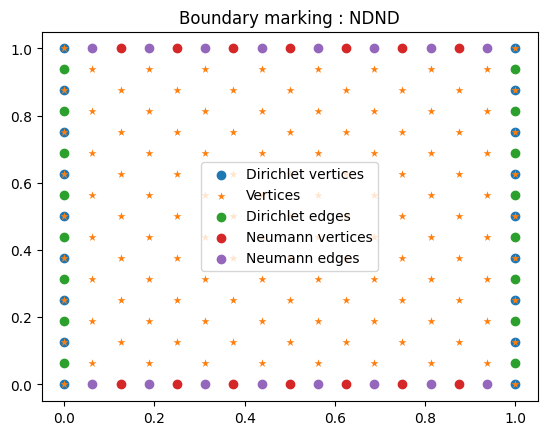

In [7]:
ml.plot_boundary(fine_mesh)

ratio =  3.9999999999999964
h =  0.12500000000033273


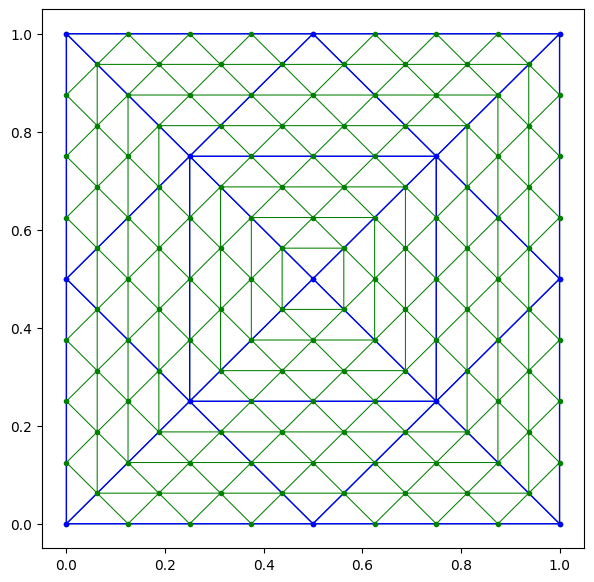

In [8]:
print('ratio = ',coarse_mesh.h_max /fine_mesh.h_max)
print('h = ',fine_mesh.h_max)

ml.compare(coarse_mesh, fine_mesh,False)

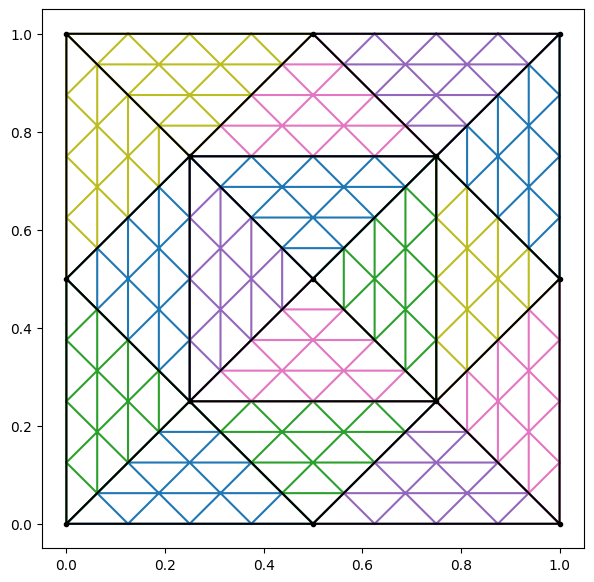

tf.Tensor([3 7], shape=(2,), dtype=int32)
Triangle #0 1st edge, vertex 2
Triangle #2 1st edge, vertex 1
Triangle #2 1st edge, vertex 2
Triangle #8 1st edge, vertex 1
Triangle #8 1st edge, vertex 2
Triangle #10 1st edge, vertex 1
Triangle #10 1st edge, vertex 2
Triangle #32 1st edge, vertex 1
Triangle #32 1st edge, vertex 2
Triangle #34 1st edge, vertex 1
Triangle #34 1st edge, vertex 2
Triangle #40 1st edge, vertex 1
Triangle #40 1st edge, vertex 2
Triangle #42 1st edge, vertex 1
Triangle #192 1st edge, vertex 2
Triangle #194 1st edge, vertex 1
Triangle #194 1st edge, vertex 2
Triangle #200 1st edge, vertex 1
Triangle #200 1st edge, vertex 2
Triangle #202 1st edge, vertex 1
Triangle #202 1st edge, vertex 2
Triangle #224 1st edge, vertex 1
Triangle #224 1st edge, vertex 2
Triangle #226 1st edge, vertex 1
Triangle #226 1st edge, vertex 2
Triangle #232 1st edge, vertex 1
Triangle #232 1st edge, vertex 2
Triangle #234 1st edge, vertex 1
tf.Tensor([256   7], shape=(2,), dtype=int32) tf.Tens

In [9]:
N_test = 1
r_interpoaltion = 4

params = {'scheme': 'VPINNs', 'N_test': N_test, 'r_interpolation': r_interpoaltion}

vp=IVPINN(pb,params,fine_mesh,False,coarse_mesh,MODEL)
model=vp.u_NN_BC

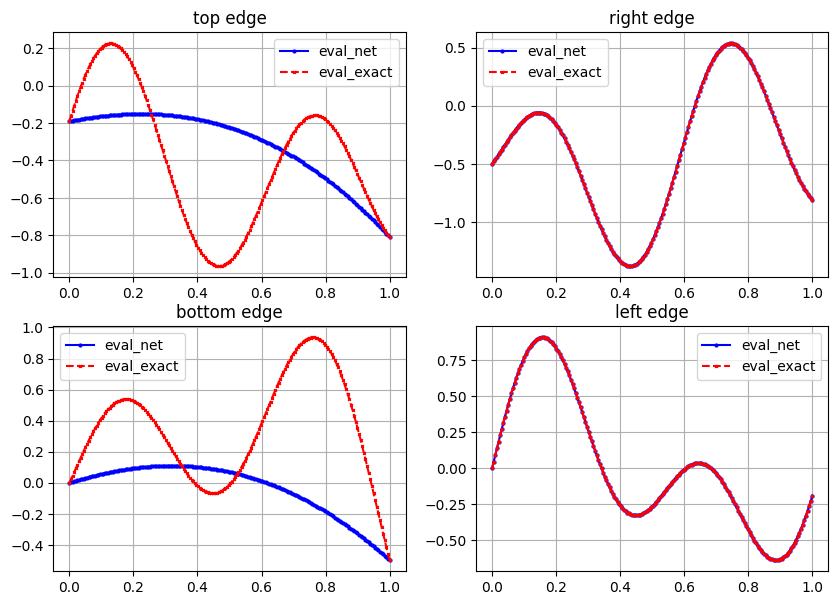

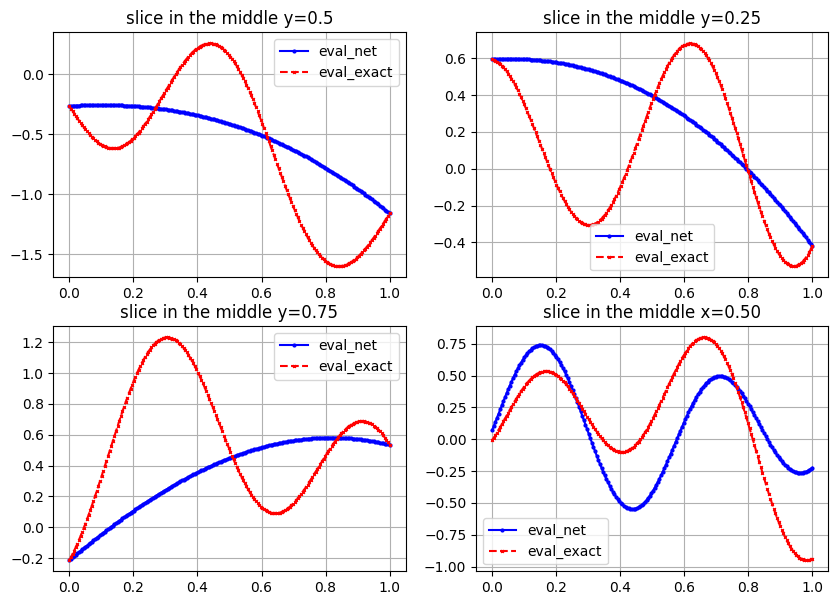

In [10]:
vp.set_bc_model(vp.standard_bc)

# helper function to treat the net as a lamda function
def model_np(x, y):
    eval = tf.constant([[x, y]], dtype=tf.float64)
    return model(eval).numpy()[0, 0]

model =vp.NN_imposeBC

plot_BC(pb.u_exact_np,model_np)

In [11]:
history=vp.train(1000,0.01)

Iteration: 0 loss: 5.1527759838 time: 84.21017956733704
Iteration: 10 loss: 4.5712533120 time: 0.1799483299255371
Iteration: 20 loss: 4.7979591749 time: 0.19558429718017578
Iteration: 30 loss: 2.6175520856 time: 0.19021320343017578
Iteration: 40 loss: 1.4601914532 time: 0.1961202621459961
Iteration: 50 loss: 0.9459381658 time: 0.18905162811279297
Iteration: 60 loss: 0.5823601663 time: 0.20702743530273438
Iteration: 70 loss: 0.3150121345 time: 0.20117712020874023
Iteration: 80 loss: 0.1721651408 time: 0.2220311164855957
Iteration: 90 loss: 0.0841811484 time: 0.2519807815551758
Iteration: 100 loss: 0.0476931416 time: 0.20687556266784668
Iteration: 110 loss: 0.0368375845 time: 0.22348880767822266
Iteration: 120 loss: 0.0319486138 time: 0.22436952590942383
Iteration: 130 loss: 0.0289875414 time: 0.27309513092041016
Iteration: 140 loss: 0.0266646424 time: 0.22648978233337402
Iteration: 150 loss: 0.0246230698 time: 0.2113204002380371
Iteration: 160 loss: 0.0227485560 time: 0.2268803119659423

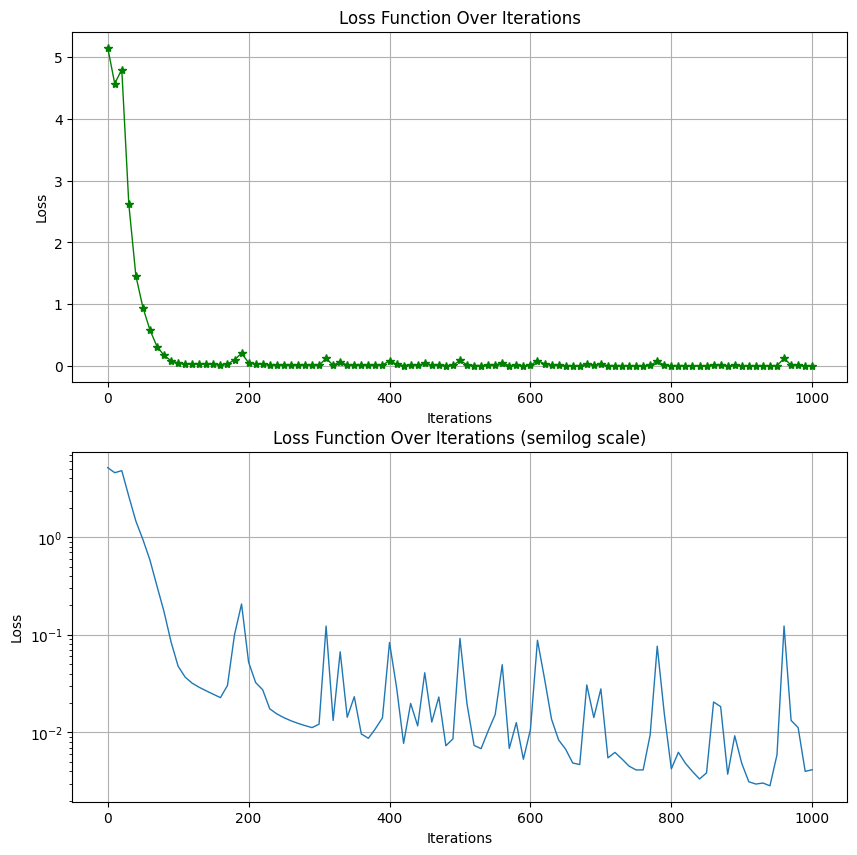

In [12]:
def plot_loss(history):  
    iterations = range(0, len(history) * 10, 10)  # Assuming losses are provided every 10 iterations

    plt.figure(figsize=(10, 10))

    plt.subplot(211)
    plt.plot(iterations, history, marker='*',color='green',linewidth=1)
    plt.title('Loss Function Over Iterations')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.grid()

    plt.subplot(212)
    plt.semilogy(iterations, history,linewidth=1)
    plt.title('Loss Function Over Iterations (semilog scale)')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.grid()
plot_loss(history)

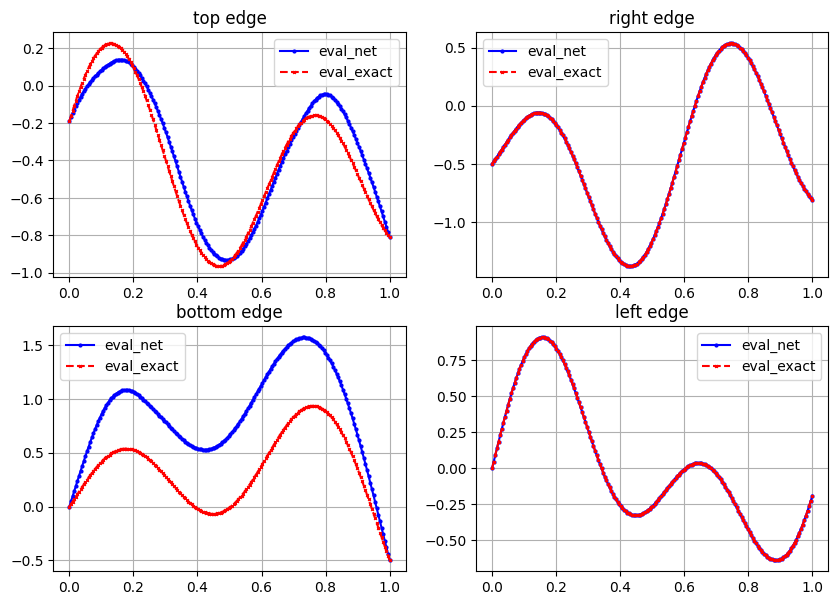

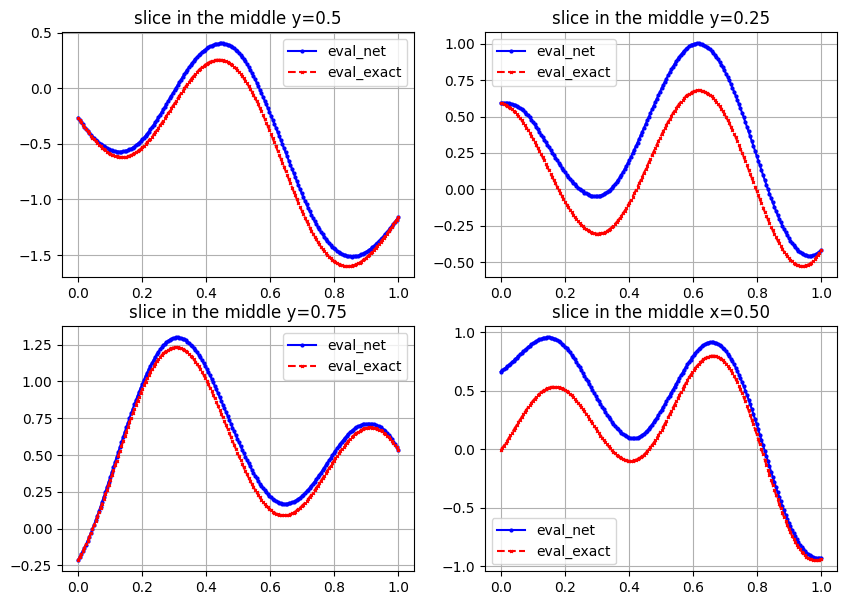

In [13]:
plot_BC(pb.u_exact_np,model_np)

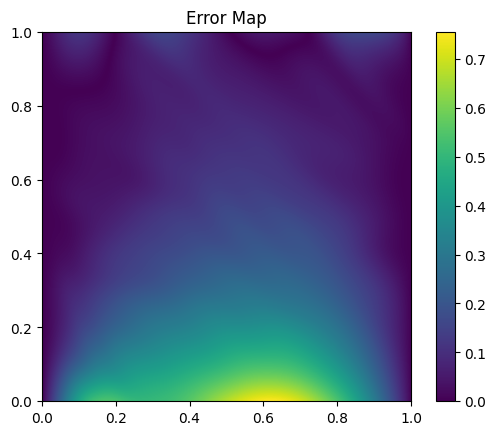

In [18]:
color_plot(vp.NN_imposeBC)

### Check Neumann condition enforcement

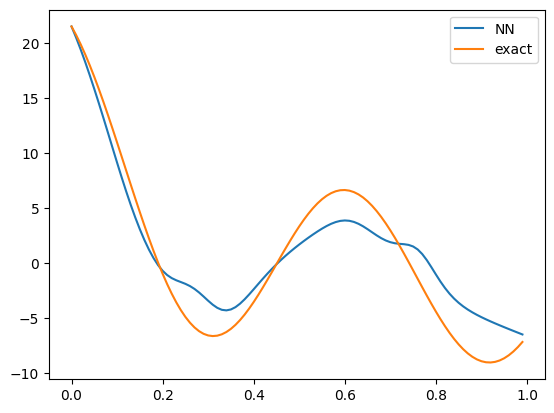

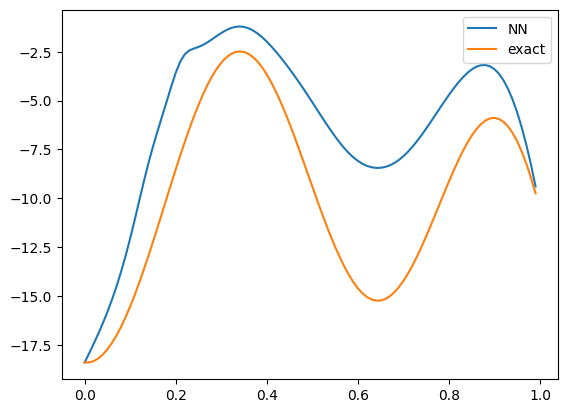

In [15]:
x = np.arange(0, 1, 0.01)
x = np.reshape(x, (-1,1))
y = np.ones((len(x), 1))

points_top = tf.constant(np.concatenate([x,y], axis=1), dtype=tf_type)

y = np.zeros((len(x), 1))
points_bottom = tf.constant(np.concatenate([x,y], axis=1), dtype=tf_type)

top_grad = np.array(vp.eval_grad_NN_BC(points_top)[:,1])
bottom_grad = np.array(vp.eval_grad_NN_BC(points_bottom)[:,1])

c_bottom = -vp.pb.mu(points_bottom[:,0], points_bottom[:,1])*bottom_grad
c_top = vp.pb.mu(points_top[:,0], points_top[:,1])*top_grad

plt.plot(x, c_top, label='NN')
plt.plot(x, vp.pb.neumann(points_top[:,0], points_top[:,1]), label='exact')
plt.legend()
plt.show()

plt.plot(x, c_bottom, label='NN')
plt.plot(x, vp.pb.neumann(points_bottom[:,0], points_bottom[:,1]), label='exact')
plt.legend()
plt.show()

### H1 and L2 convergence

In [16]:
# Get quad pairs
from numpy.polynomial import legendre

def get_quad_rule(n: int):
    # Degree of the Legendre polynomial (number of nodes - 1)

    # Nodes and weights for Gauss-Legendre quadrature
    nodes, weights = legendre.leggauss(n + 1)

    nodes=(nodes+1.0)/2.0

    # Nodes=np.array([nodes],dtype=np_type)
    Weights=np.array([weights],dtype=np_type)
    w = Weights.T @ Weights
    w = np.reshape(w, (-1,1))

    x, y =np.meshgrid(nodes,nodes)
    x = x.flatten()
    y = y.flatten()

    xy=np.array([x,y]).T

    return xy, w/4

def L2_error(xy, w):
    
    u_NN = vp.NN_imposeBC(xy)

    # Find the exact solution
    u_ex = pb.u_exact_np(xy[:,0], xy[:,1])
    u_ex = np.reshape(u_ex, (-1,1))

    integrand = (u_ex - u_NN)**2


    # Find the difference between exact and NN 
    # return (u_ex - u_NN)**2

    return np.sqrt(np.sum(w*integrand))

def semi_H1_error(xy, w):

    # Find the gradient of the exact solution
    grad_ex = np.array([pb.dudx(xy[:,0], xy[:,1]), pb.dudy(xy[:,0], xy[:,1])],dtype=np_type).T


    # Find the gradient of the NN solution
    grad_NN = vp.eval_grad_NN_BC(tf.constant(xy, dtype=tf_type))

    


    # Find the difference between exact and NN 
    pw_diff = grad_ex - grad_NN

    pw_diff = tf.reduce_sum(tf.square(pw_diff),axis=1)

    pw_diff=tf.reshape(pw_diff,(-1,1))


    return np.sqrt(np.sum(pw_diff*w))

def semi_H1_error_lambda(x,y):
    xy=np.array([[x,y]],dtype=np_type)

    # Find the gradient of the exact solution
    grad_ex = np.array([pb.dudx(xy[:,0], xy[:,1]), pb.dudy(xy[:,0], xy[:,1])],dtype=np_type).T


    # Find the gradient of the NN solution
    grad_NN = vp.eval_grad_NN_BC(tf.constant(xy, dtype=tf_type))

    


    # Find the difference between exact and NN 
    pw_diff = grad_ex - grad_NN

    pw_diff = tf.reduce_sum(tf.square(pw_diff))

    return pw_diff.numpy()

#set quad rule for calc errors
xy, w = get_quad_rule(60)

semi_H1_err = semi_H1_error(xy, w)
L2_error_ = L2_error(xy, w)
H1_err = np.sqrt(L2_error_**2 + semi_H1_err**2)

print(f"L2 error: {L2_error_}")
print(f"semi H1 error: {semi_H1_err}")
print(f"H1 error: {H1_err}")

AttributeError: 'PROBDEF' object has no attribute 'dudx'

Error   : Unknown number option 'Mesh.ElementType'


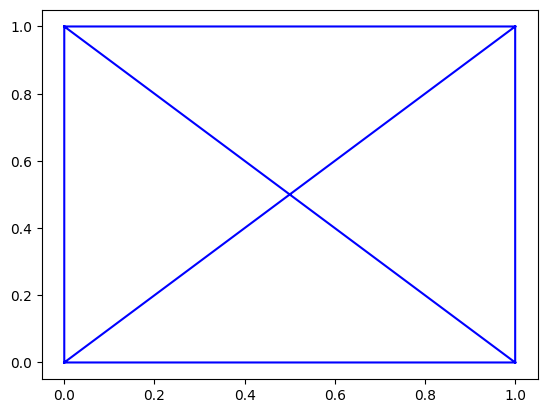

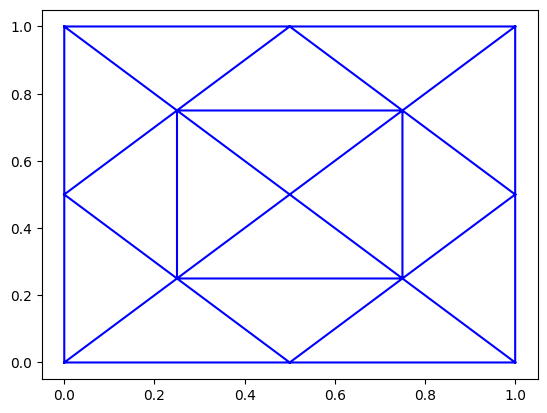

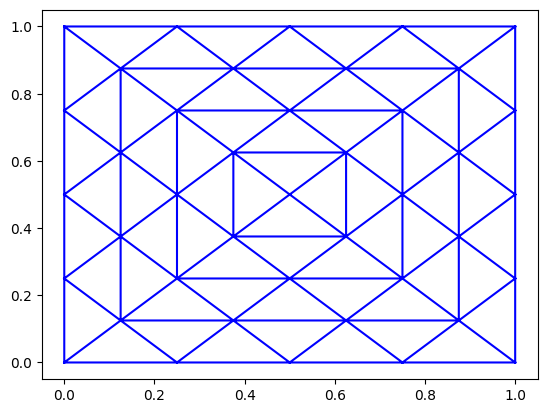

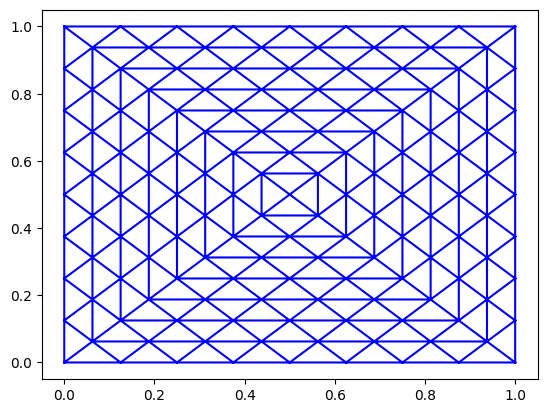

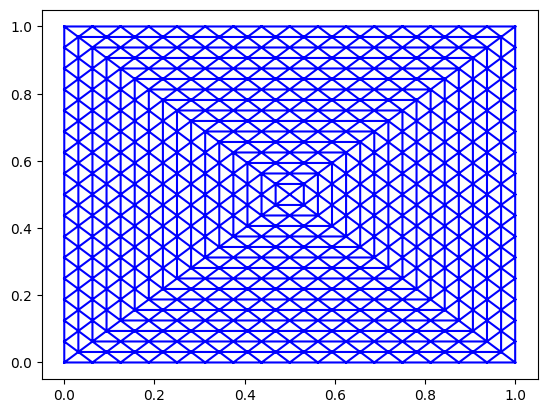

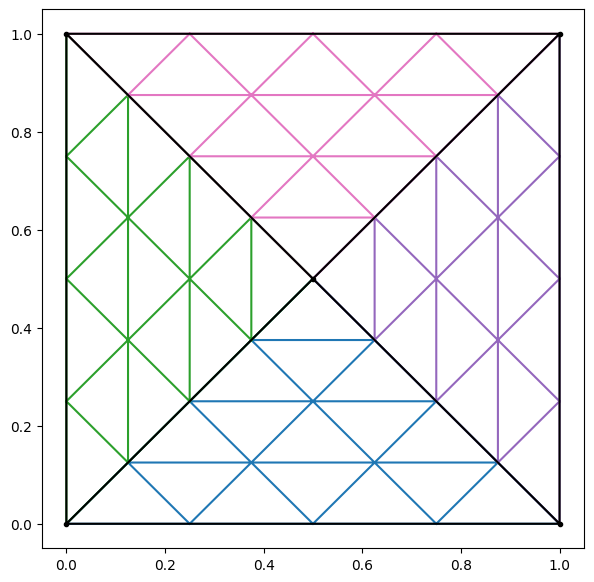

-->mesh : 
     n_triangles :  64
     n_vertices  :  41
     n_edges     :  104
     h_max           :  0.2500000000006653
     h_min           :  0.1767766952961665
-->test_fun      : 
     order       :  1
     dof         :  25
Iteration: 0 loss: 0.0055159504 time: 10.231952428817749
Iteration: 10 loss: 0.0019876994 time: 0.061811208724975586
Iteration: 20 loss: 0.0015218286 time: 0.11242818832397461
Iteration: 30 loss: 0.0014107147 time: 0.1008903980255127
Iteration: 40 loss: 0.0013575338 time: 0.06923604011535645
Iteration: 50 loss: 0.0013295105 time: 0.06628155708312988
Iteration: 60 loss: 0.0012967334 time: 0.06528639793395996
Iteration: 70 loss: 0.0012517210 time: 0.07816553115844727
Iteration: 80 loss: 0.0011793175 time: 0.07625198364257812
Iteration: 90 loss: 0.0010619670 time: 0.06760001182556152
Iteration: 100 loss: 0.0009295493 time: 0.058028221130371094
Iteration: 110 loss: 0.0008958883 time: 0.048616647720336914
Iteration: 120 loss: 0.0008556106 time: 0.0515408515930175

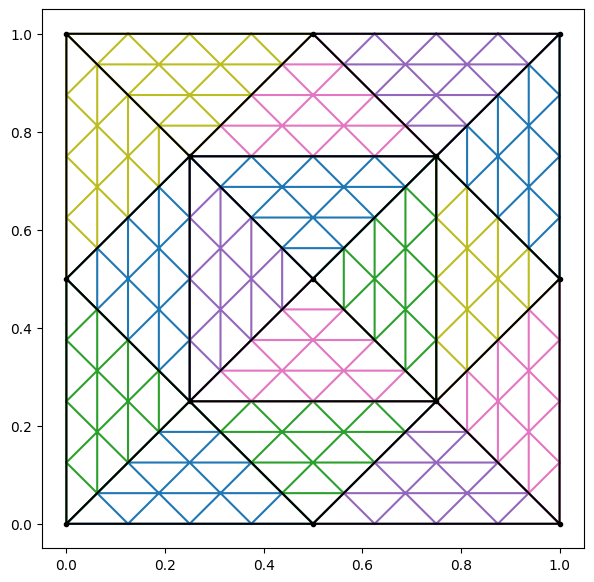

-->mesh : 
     n_triangles :  256
     n_vertices  :  145
     n_edges     :  400
     h_max           :  0.12500000000033273
     h_min           :  0.0883883476480272
-->test_fun      : 
     order       :  1
     dof         :  113
Iteration: 0 loss: 0.0003389050 time: 33.491297483444214
Iteration: 10 loss: 0.0001183384 time: 0.10893702507019043
Iteration: 20 loss: 0.0000717558 time: 0.1093292236328125
Iteration: 30 loss: 0.0000599907 time: 0.12181639671325684
Iteration: 40 loss: 0.0000572734 time: 0.12066054344177246
Iteration: 50 loss: 0.0000549131 time: 0.12749457359313965
Iteration: 60 loss: 0.0000539146 time: 0.13000130653381348
Iteration: 70 loss: 0.0000527804 time: 0.12825751304626465
Iteration: 80 loss: 0.0000516393 time: 0.126190185546875
Iteration: 90 loss: 0.0000502271 time: 0.13323402404785156
Iteration: 100 loss: 0.0000483333 time: 0.133009672164917
Iteration: 110 loss: 0.0000457068 time: 0.12922167778015137
Iteration: 120 loss: 0.0000420760 time: 0.1345195770263672
It

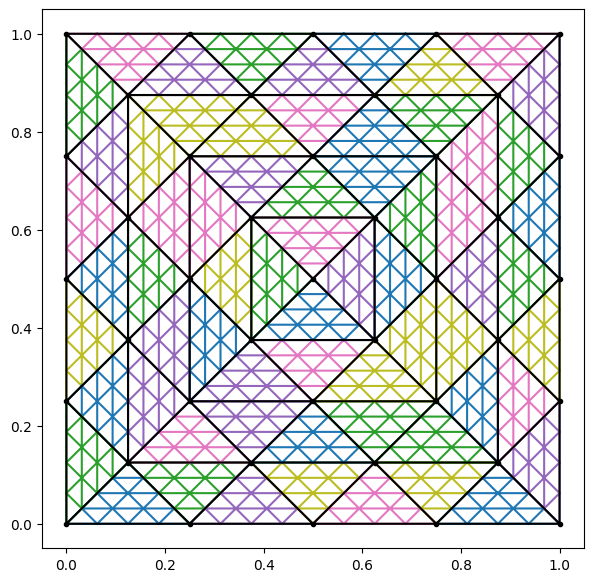

-->mesh : 
     n_triangles :  1024
     n_vertices  :  545
     n_edges     :  1568
     h_max           :  0.06250000000016642
     h_min           :  0.04419417382399782
-->test_fun      : 
     order       :  1
     dof         :  481
Iteration: 0 loss: 0.0000205413 time: 141.53820896148682
Iteration: 10 loss: 0.0000069166 time: 0.38463711738586426
Iteration: 20 loss: 0.0000063009 time: 0.37023258209228516
Iteration: 30 loss: 0.0000045179 time: 0.36191415786743164
Iteration: 40 loss: 0.0000037337 time: 0.36170506477355957
Iteration: 50 loss: 0.0000034011 time: 0.36751532554626465
Iteration: 60 loss: 0.0000033066 time: 0.3582894802093506
Iteration: 70 loss: 0.0000032789 time: 0.39667773246765137
Iteration: 80 loss: 0.0000032413 time: 0.3663008213043213
Iteration: 90 loss: 0.0000032134 time: 0.3675241470336914
Iteration: 100 loss: 0.0000031891 time: 0.3754093647003174
Iteration: 110 loss: 0.0000031631 time: 0.36648011207580566
Iteration: 120 loss: 0.0000031365 time: 0.375694274902343

In [ ]:
def restart_model():
    model = tfk.models.Sequential()
    model.add(tf.keras.Input(shape=(2,),dtype=tf.float64))
    model.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
    model.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
    model.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
    model.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
    model.add(tfkl.Dense(50, activation='tanh',kernel_initializer=initializer,dtype=tf_type,bias_initializer=initializer))
    model.add(tf.keras.layers.Dense(1,activation='linear',kernel_initializer=initializer,dtype=tf_type,use_bias=True))
    return model

xy, w = get_quad_rule(50)

H1 = []
L2 = []
semi = []
h = []
H = []

worker = gw.gmsh_worker(geo_file)

worker.construct_base_geo('./geo_core.txt', 1, 5, 1)
worker.generate_parallel_chain(True)
# mesh_chain = ml.generate_regular_mesh_chain(domain, depth=12, plot=False)
index=0
di = 2

for index in [0,1,2]:
    coarse_mesh, fine_mesh = ml.take_parallel_mesh_chain(
                        worker.chain[index],
                        worker.chain[index+di])

    model = restart_model()
    vp=IVPINN(pb,params,fine_mesh,False,coarse_mesh,model)
    history=vp.train(5000, 0.001)


    semi_H1_err = semi_H1_error(xy, w)
    L2_error_ = L2_error(xy, w)
    H1_err = np.sqrt(L2_error_**2 + semi_H1_err**2)

    H1.append(H1_err)
    semi.append(semi_H1_err)
    L2.append(L2_error_)

    h.append(fine_mesh.h_max)
    H.append(coarse_mesh.h_max)
    
    

In [ ]:
# import numpy as np
h = np.array(h)
H1 = np.array(H1)
L2 = np.array(L2)
semi = np.array(semi)



In [ ]:
# slope_H1, intercept_H1 = np.polyfit(h, H1, 1)
# slope_L2, intercept_L2 = np.polyfit(h, L2, 1)

#coeffs = np.polyfit(np.log10(h), np.log10(H1), 1)
#polynomial = np.poly1d(coeffs)
#log10_H1_fit = polynomial(np.log10(h))

#print(f"H1 rate: {coeffs[0]}")

coeffs = np.polyfit(np.log10(h), np.log10(semi), 1)
polynomial = np.poly1d(coeffs)
log10_semi_H1_fit = polynomial(np.log10(h))

print(f"semi H1 rate: {coeffs[0]}")

coeffs = np.polyfit(np.log10(h), np.log10(L2), 1)
polynomial = np.poly1d(coeffs)
log10_L2_fit = polynomial(np.log10(h))

print(f"L2 rate: {coeffs[0]}")




semi H1 rate: 2.9036397095943487
L2 rate: 3.0714625269423452


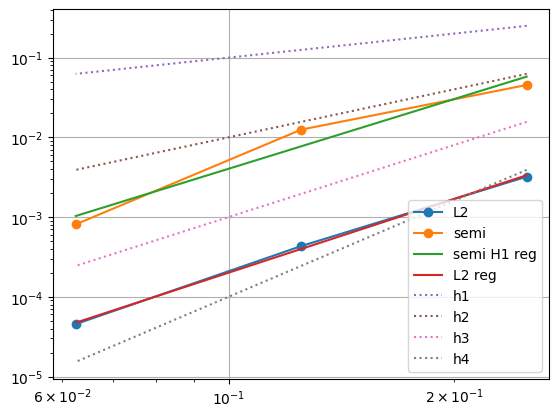

In [ ]:
#plt.loglog(h, H1, marker='o', label='H1')
plt.loglog(h, L2, marker='o', label='L2')
plt.loglog(h, semi, marker='o', label='semi')
plt.loglog(h, 10**log10_semi_H1_fit,label='semi H1 reg')
plt.loglog(h, 10**log10_L2_fit,label='L2 reg ')
plt.loglog(h, h, linestyle=':', label='h1')
plt.loglog(h, h*h, linestyle=':', label='h2')
plt.loglog(h, h*h*h, linestyle=':', label='h3')
plt.loglog(h, h*h*h*h, linestyle=':', label='h4')
plt.grid()
plt.legend()

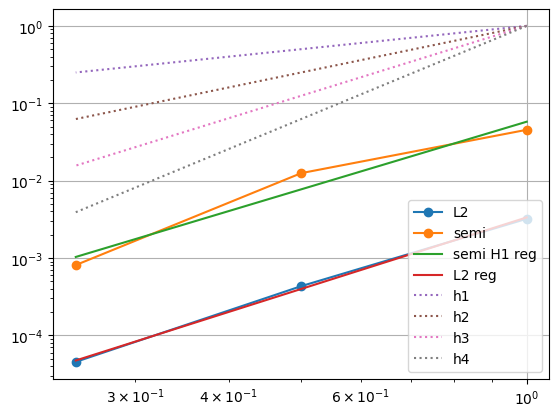

In [ ]:
#plt.loglog(h, H1, marker='o', label='H1')
h = 4*h
plt.loglog(h, L2, marker='o', label='L2')
plt.loglog(h, semi, marker='o', label='semi')
plt.loglog(h, 10**log10_semi_H1_fit,label='semi H1 reg')
plt.loglog(h, 10**log10_L2_fit,label='L2 reg ')
plt.loglog(h, h, linestyle=':', label='h1')
plt.loglog(h, h*h, linestyle=':', label='h2')
plt.loglog(h, h*h*h, linestyle=':', label='h3')
plt.loglog(h, h*h*h*h, linestyle=':', label='h4')
plt.grid()
plt.legend()